In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

In [2]:
# Read the data
df = pd.read_csv('seattle-weather.csv')

In [3]:
# Print the first 5 rows of the data
df.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
# Get the shape of the data
df.shape

(1461, 6)

In [5]:
# Check the data types of the variables
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
# Check missing values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
# Drop the CustomerID column
df.drop('date', axis=1, inplace=True)

In [9]:
df.drop('weather', axis=1, inplace=True)

In [10]:
# Get the most important features
df.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<AxesSubplot: >

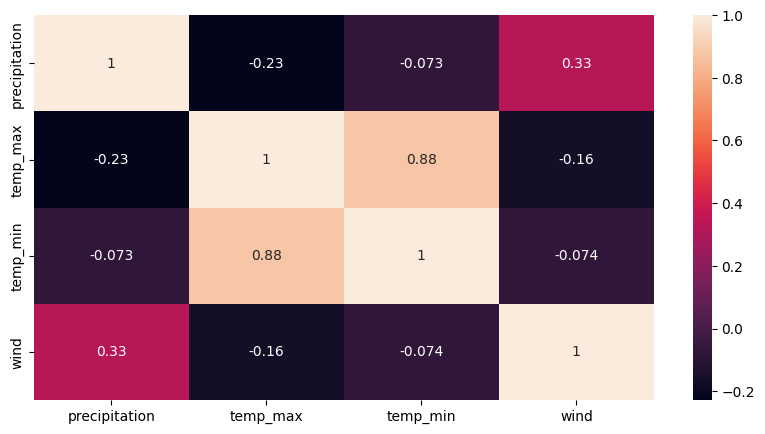

In [11]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [12]:
# Rename column
df.rename(columns={'temp_max': 'temperature_max', 'temp_min': 'temperature_min'}, inplace=True)

In [13]:
# Only get the most correlated features
df = df[['precipitation','temperature_max']]

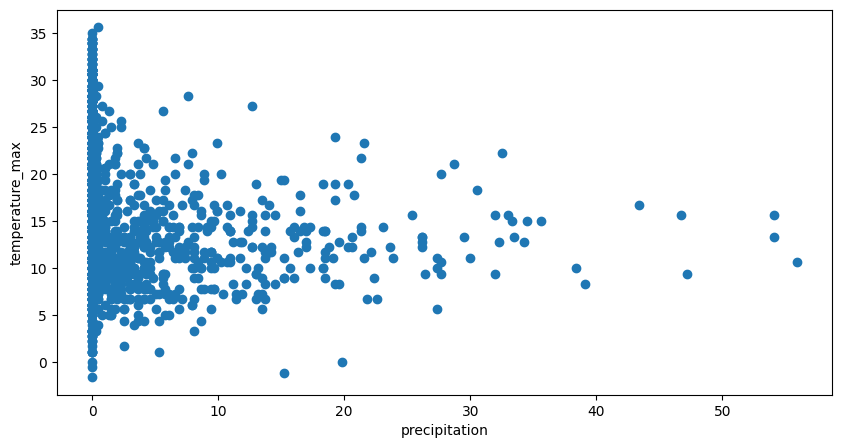

In [14]:
# Plot the data
plt.scatter(df['precipitation'], df['temperature_max'])
plt.xlabel('precipitation')
plt.ylabel('temperature_max')
plt.show()

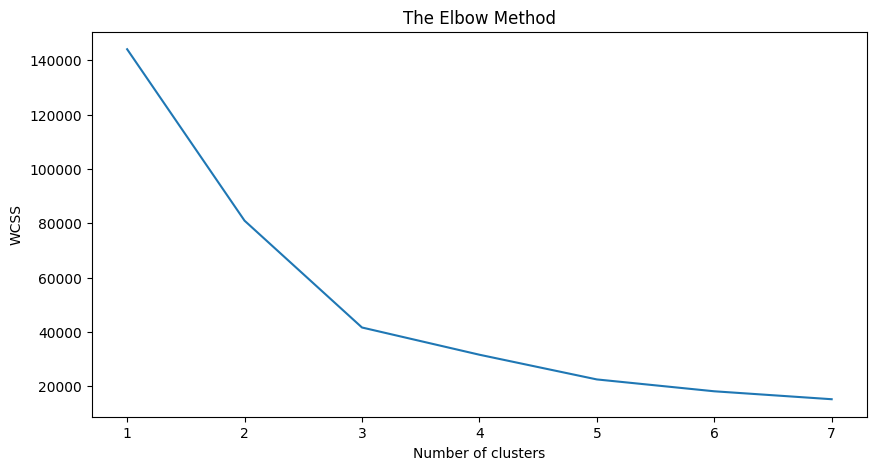

In [15]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

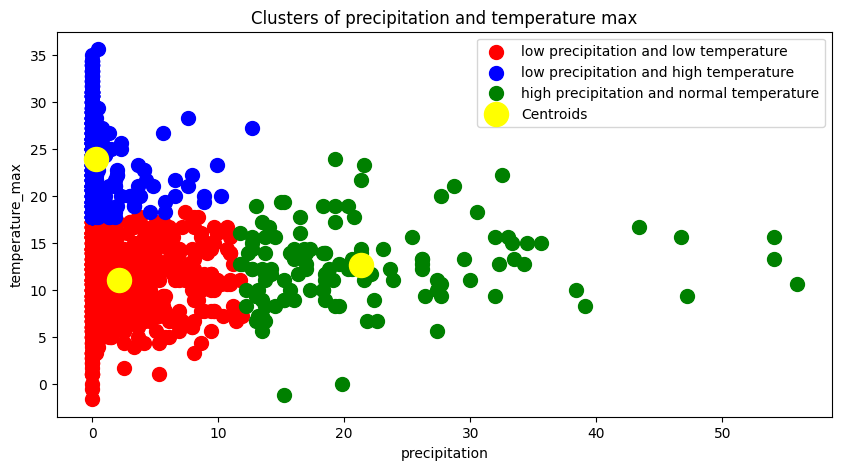

In [17]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['precipitation'], df[y_kmeans == 0]['temperature_max'], s=100, c='red', label='low precipitation and low temperature')
plt.scatter(df[y_kmeans == 1]['precipitation'], df[y_kmeans == 1]['temperature_max'], s=100, c='blue', label='low precipitation and high temperature')
plt.scatter(df[y_kmeans == 2]['precipitation'], df[y_kmeans == 2]['temperature_max'], s=100, c='green', label='high precipitation and normal temperature')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of precipitation and temperature max')
plt.xlabel('precipitation')
plt.ylabel('temperature_max')
plt.legend()
plt.show()

In [18]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [19]:
# Show the first 5 rows of the data
df.head(5)

,precipitation,temperature_max,Cluster
0,0.0,12.8,0
1,10.9,10.6,0
2,0.8,11.7,0
3,20.3,12.2,2
4,1.3,8.9,0


In [20]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [21]:
df['Cluster'].unique()

array([0, 2, 1])

In [22]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))